In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
df  = pd.read_csv('BTC-USD.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       367 non-null    float64
 2   High       367 non-null    float64
 3   Low        367 non-null    float64
 4   Close      367 non-null    float64
 5   Adj Close  367 non-null    float64
 6   Volume     367 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.2+ KB


In [4]:
df.head()
# df.info()
# df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-09,21720.080078,21802.716797,20210.306641,20363.021484,20363.021484,30364664171
1,2023-03-10,20367.001953,20370.595703,19628.253906,20187.244141,20187.244141,39578257695
2,2023-03-11,20187.876953,20792.525391,20068.660156,20632.410156,20632.410156,30180288176
3,2023-03-12,20628.029297,22185.031250,20448.806641,22163.949219,22163.949219,29279035521
4,2023-03-13,22156.406250,24550.837891,21918.199219,24197.533203,24197.533203,49466362688


In [8]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Calculate the monthly returns based on closing prices
df['Monthly_Returns'] = df.groupby('Month')['Close'].pct_change()

# Drop the rows with NaN values (first row of each month)
df.dropna(subset=['Monthly_Returns'], inplace=True)

# Find the month with the maximum positive return
max_benefit_month = df.loc[df['Monthly_Returns'].idxmax(), 'Date'].strftime('%B')

# Find the month with the maximum negative return
max_loss_month = df.loc[df['Monthly_Returns'].idxmin(), 'Date'].strftime('%B')

print("Month with the most benefit:", max_benefit_month)
print("Month with the most loss:", max_loss_month)

Month with the most benefit: March
Month with the most loss: January


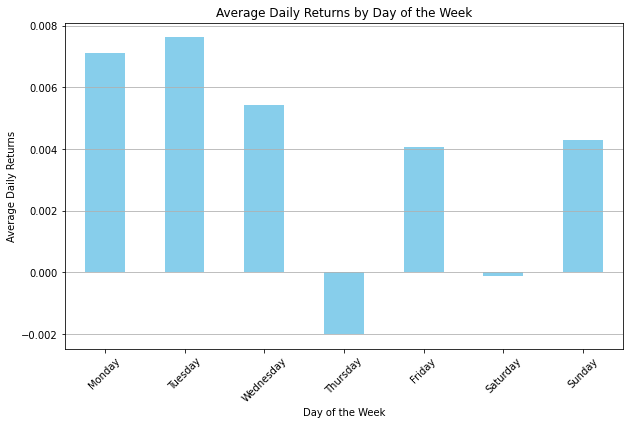

Best day of the week (highest average daily returns): Tuesday
Worst day of the week (lowest average daily returns): Thursday


In [9]:
# Extract the day of the week from the 'Date' column (Monday=0, Sunday=6)
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Calculate the daily returns based on closing prices
df['Daily_Returns'] = df['Close'].pct_change()

# Drop the rows with NaN values (first row of the dataframe)
df.dropna(subset=['Daily_Returns'], inplace=True)

# Calculate average daily returns for each day of the week
average_returns_by_day = df.groupby('Day_of_Week')['Daily_Returns'].mean()

# Define the days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the average daily returns
plt.figure(figsize=(10, 6))
average_returns_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Daily Returns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Returns')
plt.xticks(range(7), days_of_week, rotation=45)
plt.grid(axis='y')
plt.show()

# Find the best and worst days of the week
best_day = average_returns_by_day.idxmax()
worst_day = average_returns_by_day.idxmin()

print("Best day of the week (highest average daily returns):", days_of_week[best_day])
print("Worst day of the week (lowest average daily returns):", days_of_week[worst_day])

In [10]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Extract the day of the week from the index (Monday=0, Sunday=6)
df['Day_of_Week'] = df.index.dayofweek

# Calculate the total number of days
total_days = len(df)

# Initialize variables
assets = 0
buy_day = 2  # Tuesday
sell_day = 5  # Sunday

# Simulate the trading strategy
for i in range(total_days):
    if df.iloc[i]['Day_of_Week'] == buy_day:
        assets += 1 / df.iloc[i]['Open']  # Buy Bitcoin assets with all the money
    elif df.iloc[i]['Day_of_Week'] == sell_day:
        assets *= df.iloc[i]['Close']  # Sell all Bitcoin assets at the end of the 6th day

# Convert assets to USD
final_assets = assets * df.iloc[-1]['Close']

print("Final assets at the end of 6 months:", final_assets)

Final assets at the end of 6 months: 3.7202340999639087e+217
